#  8. Проверка знаний

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [43]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

heart = pd.read_csv('data/heart.csv')


In [44]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [45]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [46]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


### Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [47]:
def get_trestbps_mean(age, sex):
    if age <= 20:
        return 123 if sex == 1 else 116
    elif 21 <= age <= 30:
        return 126 if sex == 1 else 120
    elif 31 <= age <= 40:
        return 129 if sex == 1 else 127
    elif 41 <= age <= 50:
        return 135 if sex == 1 else 137
    elif 51 <= age <= 60:
        return 142 if sex == 1 else 144
    else:
        return 142 if sex == 1 else 159

# Применяем функцию к каждому ряду
heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['age'], row['sex']), axis=1)
heart.loc[300, 'trestbps_mean']


142

### Задание 8.5

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [48]:
# Инициализируем OneHotEncoder для указанных столбцов
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])

# Применяем one-hot кодирование к DataFrame
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])

# Объединяем DataFrame с новыми закодированными столбцами
heart = pd.concat([heart, type_bin], axis=1)

# Удаляем исходные столбцы, которые были закодированы
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
heart

c:\Users\monak\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\monak\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\monak\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWa

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


### Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [50]:
from sklearn.preprocessing import RobustScaler

# Создаем экземпляр RobustScaler
scaler = RobustScaler()

# Выбираем числовые признаки для нормализации
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Обновите список, если есть другие числовые признаки

# Применяем RobustScaler к числовым признакам
heart[numerical_cols] = scaler.fit_transform(heart[numerical_cols])

# Получаем стандартное отклонение нормализованного признака 'chol'
std_chol = heart['chol'].std()

# Выводим результат, округленный до шести знаков после запятой
print(f"Стандартное отклонение признака 'chol': {std_chol:.6f}")

Стандартное отклонение признака 'chol': 0.816232


### Задание 8.7
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

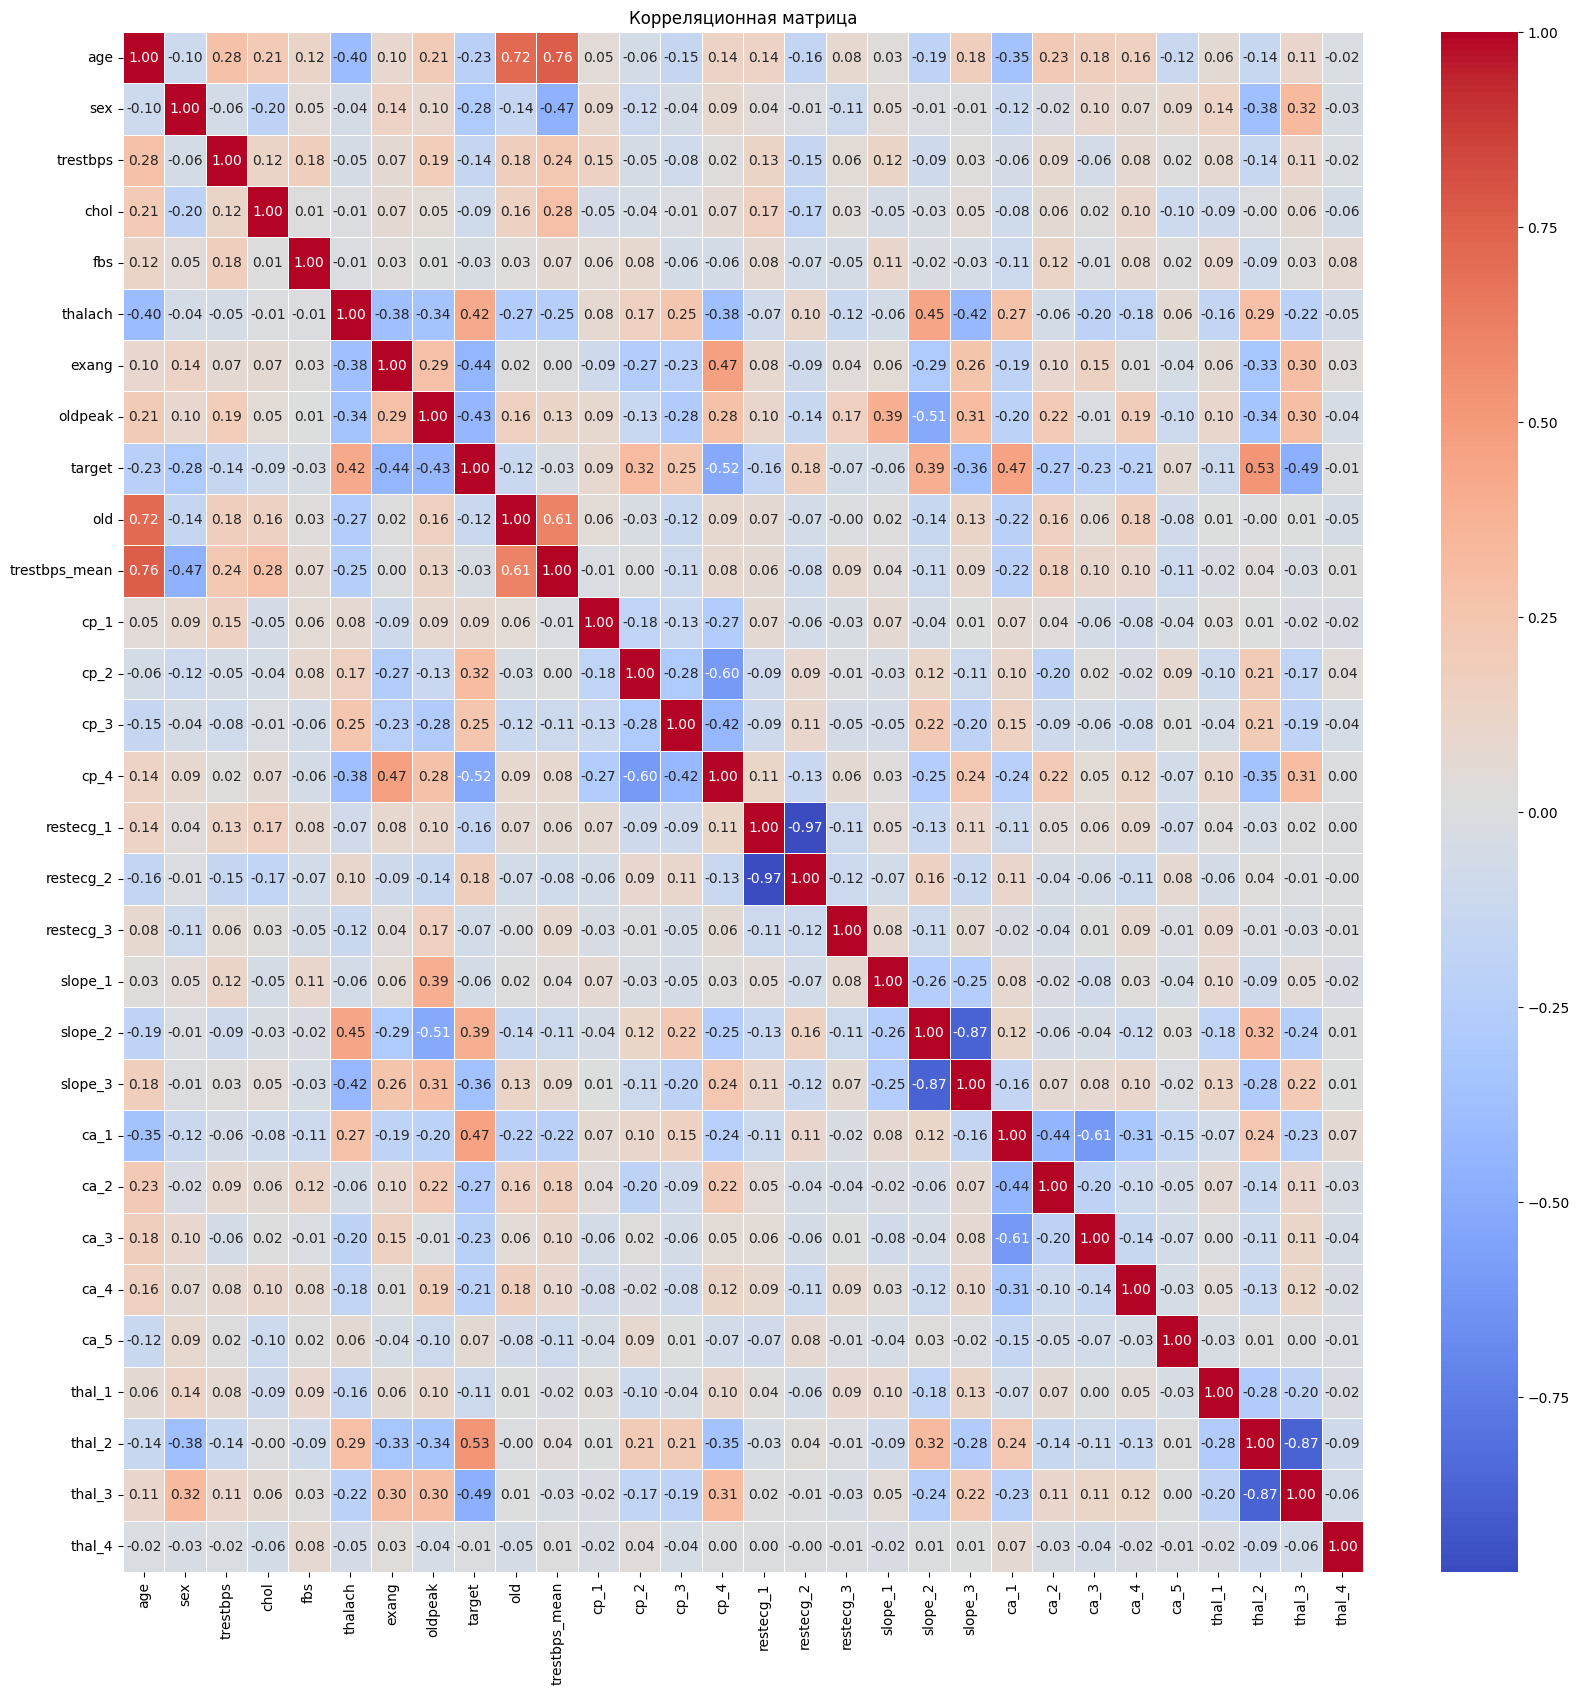

In [52]:
# Вычисляем корреляционную матрицу
correlation_matrix = heart.corr()


# Для лучшего визуального анализа, можно использовать тепловую карту
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем тепловую карту
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()